# Simulate Stochastic Policy + Graph Results

Stochastic Policy:  
If hand >= 18: 80% player stands, 20% player hits  
Else: 80% player hits, 20% player stands.

**Implement Stochastic Policy by defining what player should do on their turn.**

In [30]:
def stochastic_policy(player_hand, deck):
    player_value = player_eval(player_hand)
    
    # Implement Stochastic Policy
    # If hand >= 18: 80% Stand, 20% Hit
    # Else: 80% Hit, 20% Stand
    
    stand = False
    while player_value < 18 and stand == False:
        percent = random.randint(1, 10)
        if percent <= 8:
            # hit
            player_hand.append(deck.deal())
            player_value = player_eval(player_hand)
        else:
            # stand
            stand = True
    
    if stand:
        return player_value, player_hand, deck
    
    # player_value is now >= 18.
    if player_value < 21:
        percent = random.randint(1, 10)
        if percent > 8:
            # hit
            player_hand.append(deck.deal())
            player_value = player_eval(player_hand)        
            
        # else: Do nothing, stand.
    # else: player_value is 21 or higher, so we must stand in both cases.
    
    return player_value, player_hand, deck

## Run 100,000 games with just 1 round in each to approximate average gain/loss per round.

**Run Simulations.**

In [35]:
results = {}

num_rds = 1
num_games = 100000

net_avg = 0

for i in range(num_games):
    net_avg += play_game(stochastic_policy, num_rounds = num_rds)
net_avg /= num_games

results[num_games] = net_avg

**Graph the results.**

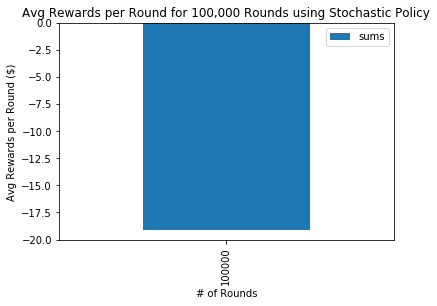

In [36]:
# Load rewards to a df
# x-axis will be # of games played. Not really an x-axis b/c there is just one value
# y-axis will the avg gains/losses for any given round using Stochastic Policy
df = pd.DataFrame(list(results.values()), columns = ["sums"], index = results.keys())

# sort by index align x/y axis properly
df.sort_index(inplace=True)

df.plot.bar()

plt.xlabel("# of Rounds")
plt.ylabel("Avg Rewards per Round ($)")
plt.title("Avg Rewards per Round for 100,000 Rounds using Stochastic Policy")

plt.show()